# Testing the DriftAnalyzer

This notebook demonstrates the functionality of the DriftAnalyzer class from the babel_ai project. We'll test various aspects of the analyzer including:
- Word statistics analysis
- Similarity analysis
- Different types of inputs
- Edge cases

In [35]:
import sys
sys.path.append('..')

from src.babel_ai.llm_drift import DriftAnalyzer, DriftExperiment, LLMProvider, PromptFetcher, ExperimentConfig
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_list = []

In [41]:
config = ExperimentConfig(
    temperature=1.2,
    max_tokens=2000,
    frequency_penalty=2.0,
    presence_penalty=2.0,
    top_p=1.0,
    max_iterations=10,
    max_total_characters=1000000
)

drift_experiment = DriftExperiment(config=config)
initial_prompt= drift_experiment.fetch_prompt(category="creative")
metrics = drift_experiment.run(
    initial_prompt=initial_prompt
)

In [42]:
pd.DataFrame([metric['analysis'] for metric in metrics])

,word_count,unique_word_count,coherence_score,is_repetitive,lexical_similarity,semantic_similarity,is_semantically_repetitive,semantic_surprise,max_semantic_surprise,is_surprising
0,15,14,0.933333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1213,1180,0.972795,False,0.005897,0.376923,False,0.001617,0.001617,False
2,542,525,0.968635,False,0.194814,0.743949,False,0.001118,0.001575,False
3,644,604,0.937888,False,0.110128,0.725946,False,0.000873,0.001334,False
4,579,543,0.937824,False,0.737879,0.886250,False,0.000401,0.000459,False
5,289,247,0.854671,False,0.323283,0.933964,True,0.000320,0.000486,False
6,242,208,0.859504,False,0.710526,0.878553,False,0.000238,0.000317,False
7,277,241,0.870036,False,0.747082,0.914856,True,0.000161,0.000223,False
8,297,257,0.865320,False,0.671141,0.992321,True,0.000129,0.000209,False
9,297,257,0.865320,True,1.000000,1.000000,True,0.000076,0.000209,False


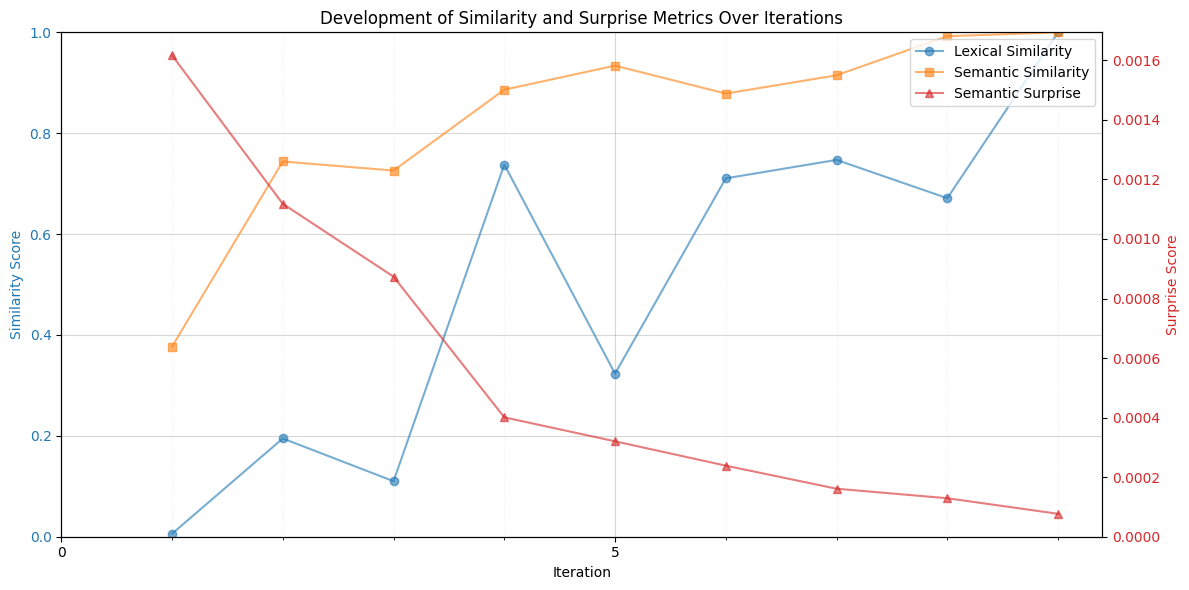

In [43]:
# Create figure and axis objects with a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Extract data from metrics
iterations = [m['iteration'] for m in metrics]
lexical_sim = [m['analysis']['lexical_similarity'] 
               if 'lexical_similarity' in m['analysis'] else None 
               for m in metrics]
semantic_sim = [m['analysis']['semantic_similarity']
                if 'semantic_similarity' in m['analysis'] else None
                for m in metrics]
semantic_surp = [m['analysis']['semantic_surprise']
                 if 'semantic_surprise' in m['analysis'] else None
                 for m in metrics]

# Remove None values (from first iteration)
valid_indices = [i for i, v in enumerate(lexical_sim) if v is not None]
iterations = [iterations[i] for i in valid_indices]
lexical_sim = [v for v in lexical_sim if v is not None]
semantic_sim = [v for v in semantic_sim if v is not None]
semantic_surp = [v for v in semantic_surp if v is not None]

# Plot similarities on the first y-axis
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Similarity Score', color='tab:blue')
ax1.plot(iterations, lexical_sim, label='Lexical Similarity',
         marker='o', color='tab:blue', alpha=0.6)
ax1.plot(iterations, semantic_sim, label='Semantic Similarity',
         marker='s', color='tab:orange', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(0, 1)  # Set y-axis limits for similarities

# Create a second y-axis for surprise
ax2 = ax1.twinx()
ax2.set_ylabel('Surprise Score', color='tab:red')
ax2.plot(iterations, semantic_surp, label='Semantic Surprise',
         marker='^', color='tab:red', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add both legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Set finer x-axis ticks every 5 iterations
max_iter = max(iterations)
ax1.set_xticks(range(0, max_iter + 1, 5))
ax1.set_xticks(range(0, max_iter + 1), minor=True)

# Add grid with major and minor lines
ax1.grid(True, which='major', linestyle='-', alpha=0.5)
ax1.grid(True, which='minor', linestyle=':', alpha=0.2)

plt.title('Development of Similarity and Surprise Metrics Over Iterations')
plt.tight_layout()
plt.show()

In [44]:
from pprint import pprint

pprint(" ".join([metric["response"] for metric in metrics]))

("[CW] Write a story in the form of an author's query letter to an agent. "
 "[Author's Name]  \n"
 '[Address]  \n'
 '[City, State, ZIP Code]  \n'
 'Email: [Your Email Address]   \n'
 'Phone: [Your Phone Number]\n'
 '\n'
 '[Date]\n'
 '\n'
 'Literary Agent’s Name  \n'
 'Agency Name    \n'
 'Agency Address     \n'
 'City, State, ZIP Code  \n'
 '\n'
 "Dear [Agent's Name],\n"
 '\n'
 'I am seeking representation for my debut novel "The Shadow of Elysium," a '
 'contemporary psychological thriller complete at 85,000 words. Given your '
 'interest in character-driven narratives with suspenseful twists and dark '
 'undertones—as evidenced by your work with authors like Jane Doe—I believe it '
 'would be an excellent fit for your list.\n'
 '\n'
 'In the quiet coastal town of Ravenwood Bay stands The Elysium Hotel—a '
 'once-grand establishment now steeped in tales as enigmatic as its owner. '
 "When Elara Thompson wakes up on the hotel's deserted rooftop without any "
 "memory of how she got th